# Combining Data Cubes with Feature Data from geoDB

The geoDB is a service provided by the [Euro Data Cube project](https://eurodatacube.com) (EDC) as a payed service. It comes
with a Python client that provides high level access to your data and a certain amount of space in a PostGreSQL database. For exploring data you will need a geoDB subscription which you can purchase at the [EDC market place](https://eurodatacube.com/marketplace).

You can access the service in two ways:

- By using the Jupyter Python notebook provided by EDC Marketplace (configuration-free, ```geodb = GeoDBClient()```)
- By using your own Jupyter notebook or Python script by providing a client id and secret to the GeoDBClient (```geodb = GeoDBClient(client_id="myid", client_secret="mysecet")```)

The client ID and secret are provided by EDC. You will find them in your EDC Marketplace account section. You can also provide the credentials
via system environment variables (GEODB_AUTH_CLIENT_ID and GEODB_AUTH_CLIENT_SECRET). These variables can be supplied via a .env file.

## Exploring Data




In [1]:
from xcube_geodb.core.geodb import GeoDBClient

##  Login from any machine

Install xcube geoDB with command:
  
 `conda install xcube_geodb -c conda-forge`


In [2]:
### uncomment if not on EDC

server_url='https://xcube-geodb.brockmann-consult.de'
server_port=443
client_id=""
client_secret=""
auth_audience= 'https://xcube-users.brockmann-consult.de/api/v2'

geodb = GeoDBClient(
  server_url=server_url,
  server_port=server_port,
  client_id=client_id,
  client_secret=client_secret,
  auth_aud=auth_audience
)

## Login in EDC environment

In [3]:
### comment if not on EDC

# geodb = GeoDBClient()

## Get user name

In [4]:
geodb.whoami

'geodb_mpi-test'

## Insert into collection

In this notebook, we work with example data that we insert into the geodb. Before we do this, we first create a collection in the geodb. The collection is passed in the form of a dictionary. The collection will be saved permanently if not removed.

In [6]:
import geopandas as gpd

# Have a look at fiona feature schema
collections = {
        "finnish_cities":
        {
            "crs": 4326,
            "properties":
            {
                "NAME": "text",
                "POP_MIN": "int",
                "POP_MAX": "int",
                "lat": "text",
                "lon": "text",
                "time": "text",
                "temperature (K)": "float"
            }
        }
    }


geodb.create_collections(collections, clear=True)

Now, add data to the collection.

In [7]:
gdf = gpd.read_file('data/finnish_cities.geojson')
geodb.insert_into_collection('finnish_cities', gdf) # minimizing rows to 100, if you are in EDC, you dont need to make the subset.

Processing rows from 0 to 21


Retrieve the collection's content.

In [8]:
gdf = geodb.get_collection('finnish_cities')
gdf

,id,created_at,modified_at,geometry,name,pop_min,pop_max,lat,lon,time,temperature (k)
0,1,2023-08-12T13:15:56.493213+00:00,None,POINT (24.47200 60.99700),Hämeenlinna,47261,47261,60.996996,24.472,2020-02-01,268.070007
1,2,2023-08-12T13:15:56.493213+00:00,None,POINT (26.70900 60.87600),Kouvola,31133,31133,60.876,26.709004,2020-02-01,265.479980
2,3,2023-08-12T13:15:56.493213+00:00,None,POINT (27.28500 61.69000),Mikkeli,46550,46550,61.689996,27.285004,2020-02-01,269.299988
3,4,2023-08-12T13:15:56.493213+00:00,None,POINT (28.88334 61.86662),Savonlinna,13114,27353,61.866623,28.883343,2020-02-01,268.299988
4,5,2023-08-12T13:15:56.493213+00:00,None,POINT (21.77494 61.47889),Pori,66280,76772,61.478895,21.774939,2020-02-01,266.389984
5,6,2023-08-12T13:15:56.493213+00:00,None,POINT (26.60002 67.41706),Sodankylä,4091,8942,67.417059,26.60002,2020-02-01,253.909988
6,7,2023-08-12T13:15:56.493213+00:00,None,POINT (25.74999 62.26035),Jyväskylä,85026,98136,62.260346,25.749994,2020-02-01,270.029999
7,8,2023-08-12T13:15:56.493213+00:00,None,POINT (27.69494 62.89429),Kuopio,89104,91900,62.894286,27.69494,2020-02-01,267.910004
8,9,2023-08-12T13:15:56.493213+00:00,None,POINT (28.18333 61.06706),Lappeenranta,49757,59276,61.067059,28.183334,2020-02-01,266.880005
9,10,2023-08-12T13:15:56.493213+00:00,None,POINT (25.66602 60.40036),Porvoo,12242,12242,60.400356,25.66602,2020-02-01,260.940002


Plot the GeoDataframe, select a reasonable column to diplay

<Axes: >

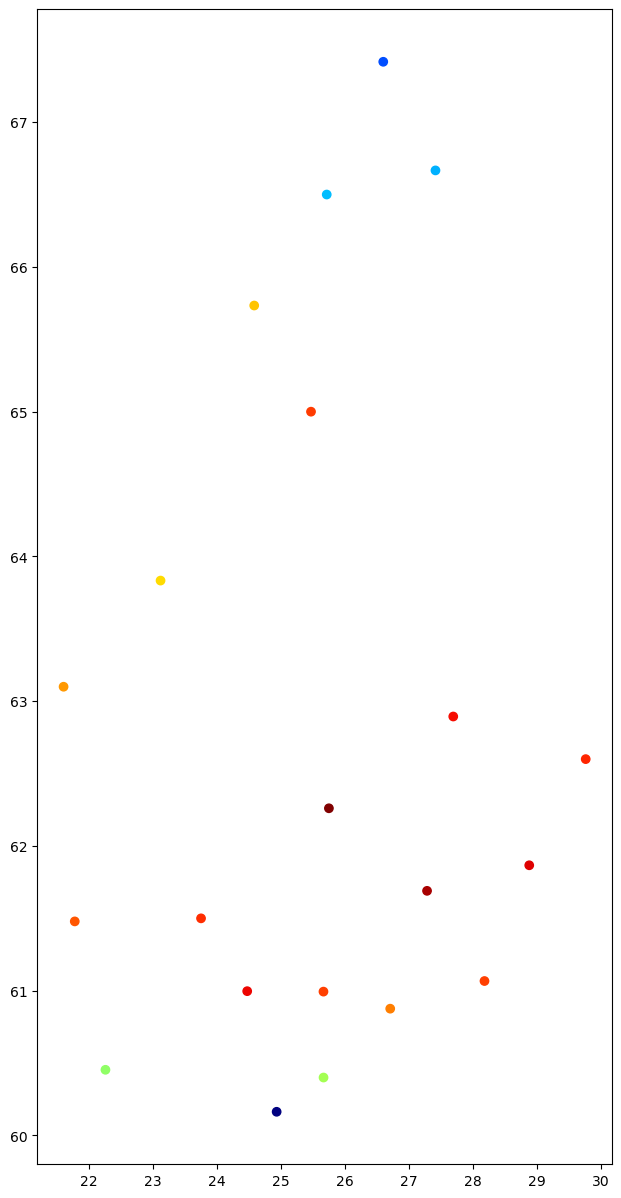

In [9]:
gdf.plot(column="temperature (k)", figsize=(15,15), cmap = 'jet')

Filter by bbox.

In [10]:
gdf_sub = geodb.get_collection_by_bbox(collection="finnish_cities",  bbox = (23.5, 60.5, 29.5, 62.5), comparison_mode="contains")
gdf_sub

,id,created_at,modified_at,geometry,name,pop_min,pop_max,lat,lon,time,temperature (k)
0,1,2023-08-12T13:15:56.493213+00:00,None,POINT (24.47200 60.99700),Hämeenlinna,47261,47261,60.996996,24.472,2020-02-01,268.070007
1,2,2023-08-12T13:15:56.493213+00:00,None,POINT (26.70900 60.87600),Kouvola,31133,31133,60.876,26.709004,2020-02-01,265.479980
2,3,2023-08-12T13:15:56.493213+00:00,None,POINT (27.28500 61.69000),Mikkeli,46550,46550,61.689996,27.285004,2020-02-01,269.299988
3,4,2023-08-12T13:15:56.493213+00:00,None,POINT (28.88334 61.86662),Savonlinna,13114,27353,61.866623,28.883343,2020-02-01,268.299988
4,7,2023-08-12T13:15:56.493213+00:00,None,POINT (25.74999 62.26035),Jyväskylä,85026,98136,62.260346,25.749994,2020-02-01,270.029999
5,9,2023-08-12T13:15:56.493213+00:00,None,POINT (28.18333 61.06706),Lappeenranta,49757,59276,61.067059,28.183334,2020-02-01,266.880005
6,13,2023-08-12T13:15:56.493213+00:00,None,POINT (25.66493 60.99386),Lahti,96190,98826,60.99386,25.664934,2020-02-01,266.809998
7,20,2023-08-12T13:15:56.493213+00:00,None,POINT (23.75001 61.50000),Tampere,202687,259279,61.500005,23.750013,2020-02-01,267.239990


<Axes: >

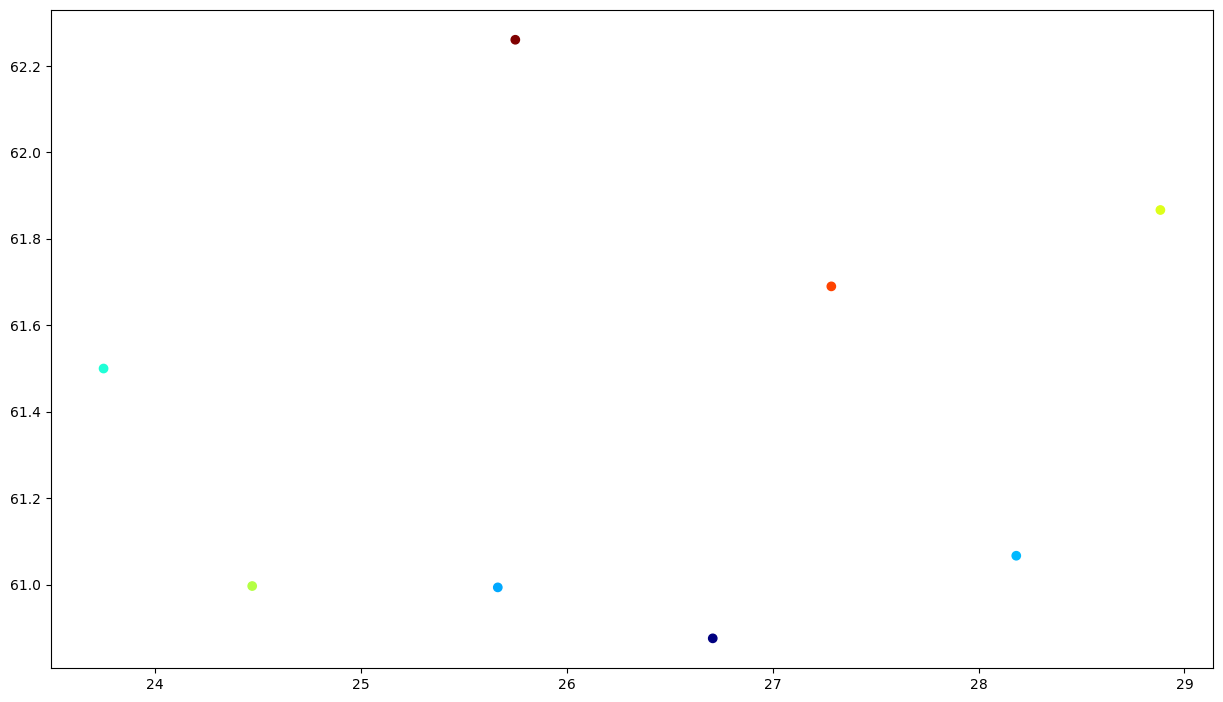

In [11]:
gdf_sub.plot(column="temperature (k)", figsize=(15,15), cmap = 'jet')

Filtering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [12]:
gdf_sub = geodb.get_collection_pg(collection='finnish_cities', where='pop_max > 100000')
gdf_sub

,id,created_at,modified_at,geometry,name,pop_min,pop_max,lat,lon,time,temperature (k)
0,15,2023-08-12T13:15:56.493213+00:00,None,POINT (22.25496 60.45387),Turku,174940,175945,60.453867,22.254962,2020-02-01,260.500000
1,17,2023-08-12T13:15:56.493213+00:00,None,POINT (25.47001 65.00000),Oulu,128618,136752,64.999998,25.470011,2020-02-01,266.959991
2,20,2023-08-12T13:15:56.493213+00:00,None,POINT (23.75001 61.50000),Tampere,202687,259279,61.500005,23.750013,2020-02-01,267.239990
3,21,2023-08-12T13:15:56.493213+00:00,None,POINT (24.93246 60.16380),Helsinki,558457,1115000,60.177509,24.932181,2020-02-01,249.879990


<Axes: >

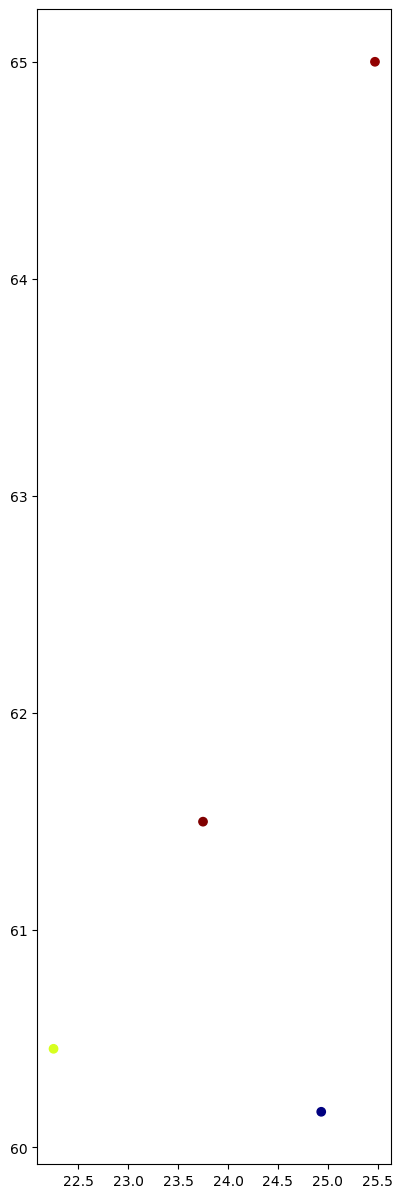

In [13]:
gdf_sub.plot(column="temperature (k)", figsize=(15,15), cmap = 'jet')

## Combine with Data Cubes

Load in a data cube, e.g., one from the CCI store. 

In [14]:
from xcube.core.store import new_data_store

In [15]:
zarr_store = new_data_store('ccizarr')

In [16]:
zarr_store.list_data_ids()

['ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2020-fv4.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-OCO-2-FOCAL-2014-2021-v10.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LAKES-L3S-LK_PRODUCTS-MERGED-1992-09-fv2.0.1.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_NIGHT-2002-2018-fv3.00.zarr',
 'ESACCI-OC-L3S-IOP-MERGED-1M_MONTHLY_4km_GEO_PML_OCx_QAA-1997-2020-fv5.0.zarr',
 'ESACCI-PERMAFROST-L4-ALT-MODISLST-

In [17]:
snow_ds = zarr_store.open_data('ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr')
snow_ds

<xarray.Dataset>
Dimensions:   (lat: 1800, nv: 2, lon: 3600, time: 7934)
Coordinates:
  * lat       (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
    lat_bnds  (lat, nv) float64 dask.array<chunksize=(900, 2), meta=np.ndarray>
  * lon       (lon) float64 -179.9 -179.8 -179.8 -179.7 ... 179.7 179.8 179.9
    lon_bnds  (lon, nv) float64 dask.array<chunksize=(900, 2), meta=np.ndarray>
  * time      (time) datetime64[ns] 1979-01-02 1979-01-04 ... 2020-05-24
Dimensions without coordinates: nv
Data variables:
    swe       (time, lat, lon) float64 dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    swe_std   (time, lat, lon) float64 dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                CF-1.9
    cdm_data_type:              grid
    comment:                    The following auxiliary datasets are used for...
    creator_email:              kari.luojus@fmi.fi (Scientific and Production...
    creator_name:               Finnish Meteorological Institute
    creator_url:                www.fmi.fi
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          20200524T000000Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19790102T000000Z
    title:                      ESA CCI snow SWE product level L3C daily, Dyn...
    tracking_id:                25063fb5-47ad-424a-8f26-29bdf35efb78

Using the following function, we can extract values for the spatio-temporal location in the points dataset. We need to set the time column as time specifically for this.import pandas as pd
gdf['time'] = pd.to_datetime(gdf['time'])

In [18]:
import pandas as pd
gdf['time'] = pd.to_datetime(gdf['time'])

In [19]:
from xcube.core.extract import get_cube_values_for_points

In [20]:
snow_values = get_cube_values_for_points(snow_ds, points=gdf)
snow_values

<xarray.Dataset>
Dimensions:  (idx: 21)
Dimensions without coordinates: idx
Data variables:
    swe      (idx) float64 dask.array<chunksize=(21,), meta=np.ndarray>
    swe_std  (idx) float64 dask.array<chunksize=(21,), meta=np.ndarray>

In [21]:
gdf['snow_water_equivalent'] = snow_values['swe']
gdf

,id,created_at,modified_at,geometry,name,pop_min,pop_max,lat,lon,time,temperature (k),snow_water_equivalent
0,1,2023-08-12T13:15:56.493213+00:00,None,POINT (24.47200 60.99700),Hämeenlinna,47261,47261,60.996996,24.472,2020-02-01,268.070007,0.0
1,2,2023-08-12T13:15:56.493213+00:00,None,POINT (26.70900 60.87600),Kouvola,31133,31133,60.876,26.709004,2020-02-01,265.479980,0.0
2,3,2023-08-12T13:15:56.493213+00:00,None,POINT (27.28500 61.69000),Mikkeli,46550,46550,61.689996,27.285004,2020-02-01,269.299988,0.0
3,4,2023-08-12T13:15:56.493213+00:00,None,POINT (28.88334 61.86662),Savonlinna,13114,27353,61.866623,28.883343,2020-02-01,268.299988,0.0
4,5,2023-08-12T13:15:56.493213+00:00,None,POINT (21.77494 61.47889),Pori,66280,76772,61.478895,21.774939,2020-02-01,266.389984,10.0
5,6,2023-08-12T13:15:56.493213+00:00,None,POINT (26.60002 67.41706),Sodankylä,4091,8942,67.417059,26.60002,2020-02-01,253.909988,1.0
6,7,2023-08-12T13:15:56.493213+00:00,None,POINT (25.74999 62.26035),Jyväskylä,85026,98136,62.260346,25.749994,2020-02-01,270.029999,18.0
7,8,2023-08-12T13:15:56.493213+00:00,None,POINT (27.69494 62.89429),Kuopio,89104,91900,62.894286,27.69494,2020-02-01,267.910004,17.0
8,9,2023-08-12T13:15:56.493213+00:00,None,POINT (28.18333 61.06706),Lappeenranta,49757,59276,61.067059,28.183334,2020-02-01,266.880005,0.0
9,10,2023-08-12T13:15:56.493213+00:00,None,POINT (25.66602 60.40036),Porvoo,12242,12242,60.400356,25.66602,2020-02-01,260.940002,0.0


We may now plot the values against each other in a scatter plot. Note that negative snow values represent flagged data.

<Axes: xlabel='temperature (k)', ylabel='snow_water_equivalent'>

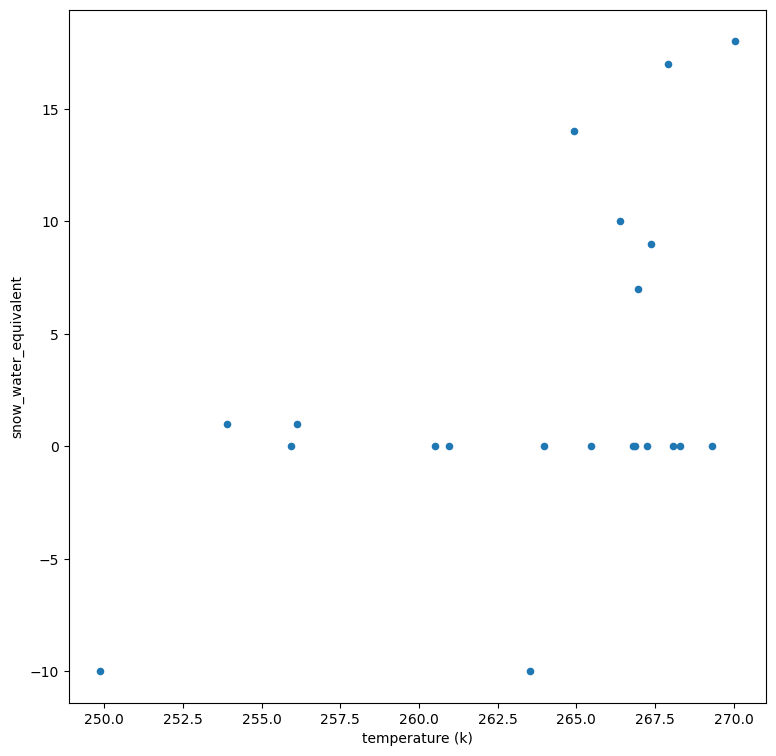

In [22]:
gdf.plot.scatter('temperature (k)', 'snow_water_equivalent', figsize=(9, 9))

Finally, remove the collection.

In [23]:
geodb.drop_collection('finnish_cities')